# Trabajo practico 1

Utilizando Matlab, Octave o Python implementar un **Generador Congruencial Lineal** (GCL) de módulo 232, multiplicador 1013904223, incremento de 1664525 y semilla igual a la parte entera del promedio de los números de padrón de los integrantes del grupo.

a) Informar los primeros 10 números generados.

b) Modificar el GCL para que devuelva números al azar entre 0 y 1.

c) Realizar un histograma mostrando 100.000 valores generados en el punto b.

In [2]:
# a
def gcl(seed = 10, iterations = 10, multiplier = 1013904223, addition = 1664525, module = 232):
  x = seed
  for _ in range(iterations):
    x = (multiplier * x + addition) % module
    print(x)

gcl()

211
90
179
10
211
90
179
10
211
90


In [5]:
# b
def gcl2(seed = 10, iterations = 10, multiplier = 1013904223, addition = 1664525, module = 232):
  x = seed
  for _ in range(iterations):
    x = ((multiplier * x + addition) % module) / module
    print(x)

gcl2()

0.9094827586206896
0.09789313324566545
0.768105525459195
0.4524685853514178
0.6485458553351205
0.5971268353791073
0.2459375113248825
0.6824414167424728
0.5835573108031832
0.6671804780590123


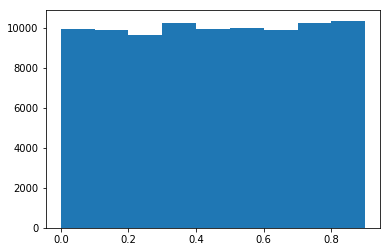

In [8]:
# c
import matplotlib.pyplot as plt

def gcl_with_histogram(seed = 10, iterations = 10, multiplier = 1013904223, addition = 1664525, module = 232):
  results = []
  x = seed
  for _ in range(iterations):
    x = ((multiplier * x + addition) % module) / module
    results.append(x)

  bins = [ bin / 10 for bin in range(10) ]
  plt.hist(results, bins)
  plt.show()

gcl_with_histogram(iterations= 100000)